<a href="https://colab.research.google.com/github/nicolecosta/visaocomputacional/blob/main/resumao_visao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUMÃO VISÃO COMPUTACIONAL 2021.2**
NICOLE SARVASI ALVES DA COSTA

**Importar o móludo cv2 e o módulo matplotlib**

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

**Aquisição de imagem ou vídeo**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving lena.jpg to lena.jpg


**Fazer leitura da imagem**

In [4]:
img = cv2.imread('lena.jpg')

**Passar para níveis de cinza**

In [7]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Exemplo: converter imagem para binária e armazenar numa nova variável e fazer sua exibição

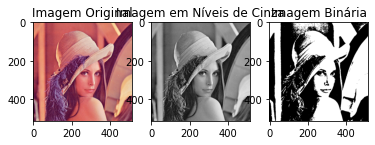

In [8]:
#Referência: https://docs.opencv.org/4.5.2/d6/d00/tutorial_py_root.

ret,img_th = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(ncols=3)
ax[0].imshow(img[...,::-1])  #BGR para RGB
ax[0].set_title('Imagem Original')
ax[1].imshow(gray_img,cmap=plt.cm.gray)
ax[1].set_title('Imagem em Níveis de Cinza')
ax[2].imshow(img_th,cmap=plt.cm.gray)
ax[2].set_title('Imagem Binária')
plt.show()

**LEITURA DE IMAGEM**

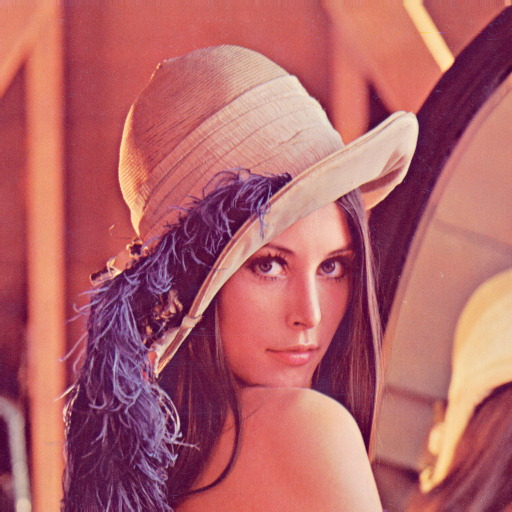

In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys #eventualmente colocar alguma mensagem

#testar se está lendo imagem
img = cv.imread("lena.jpg") #leitura

#processamento
if img is None:
  sys.exit("Could not read the image.")

cv2_imshow(img) #"printar" imagem

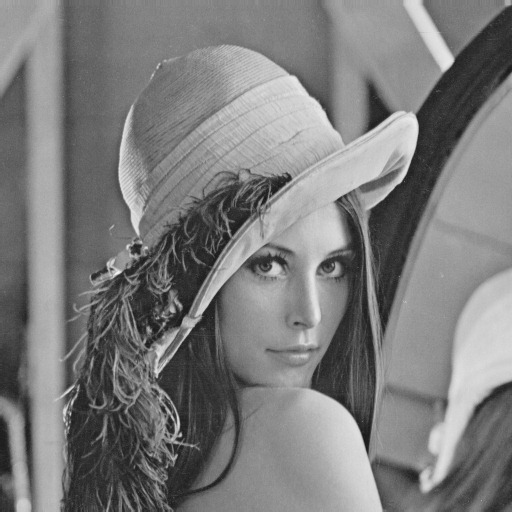

True

In [11]:
#trasformar imagem de BGR para nível de cinza
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

#gravar imagem no diretório
cv.imwrite("lena_gra.png", gray_img)

**LEITURA DE VÍDEO**

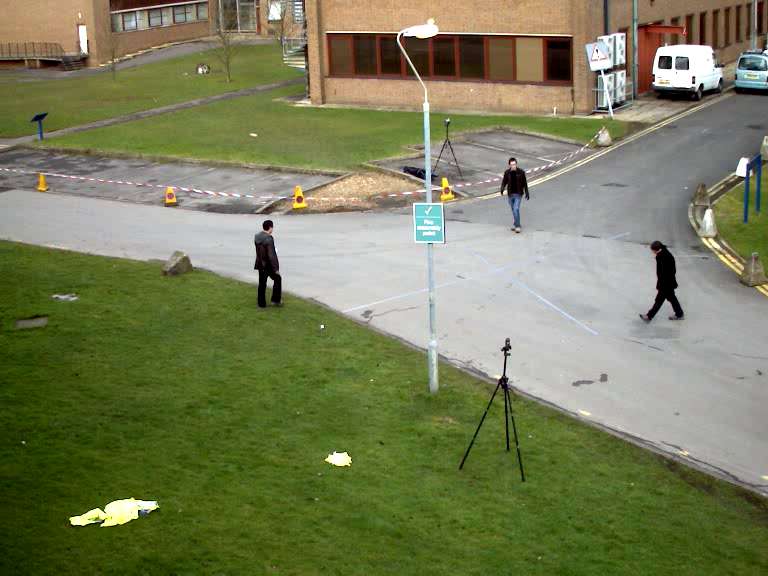

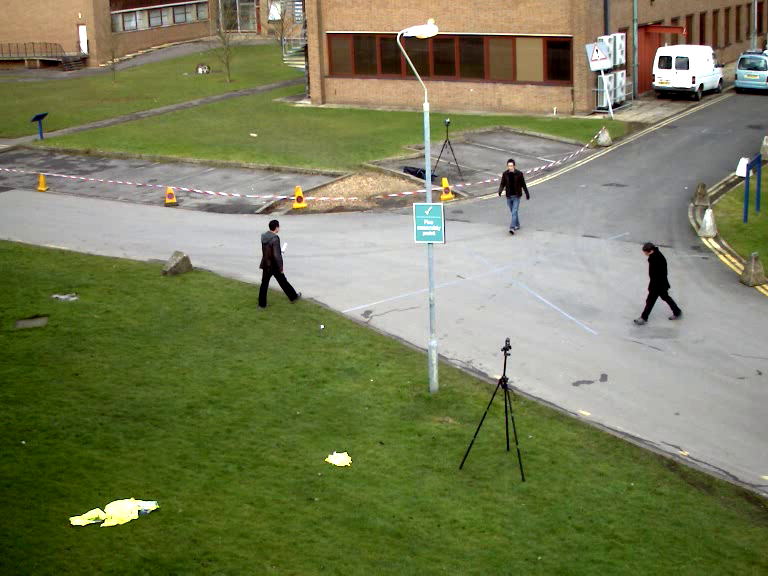

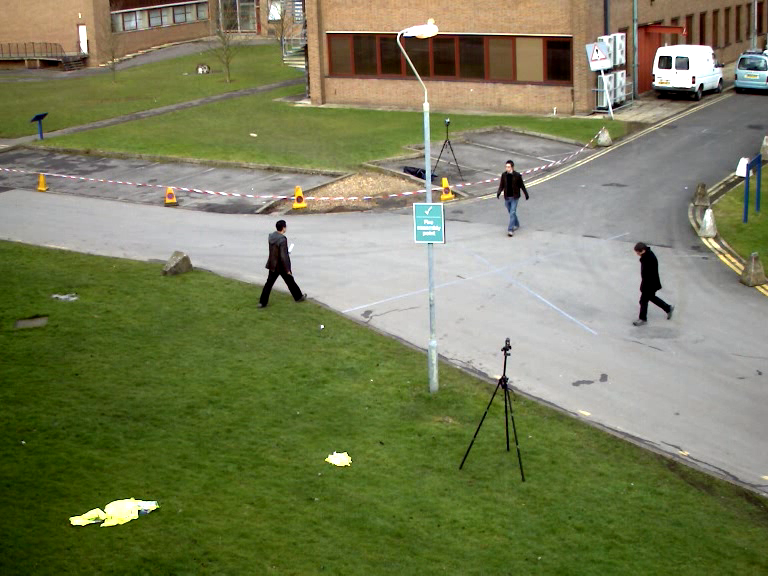

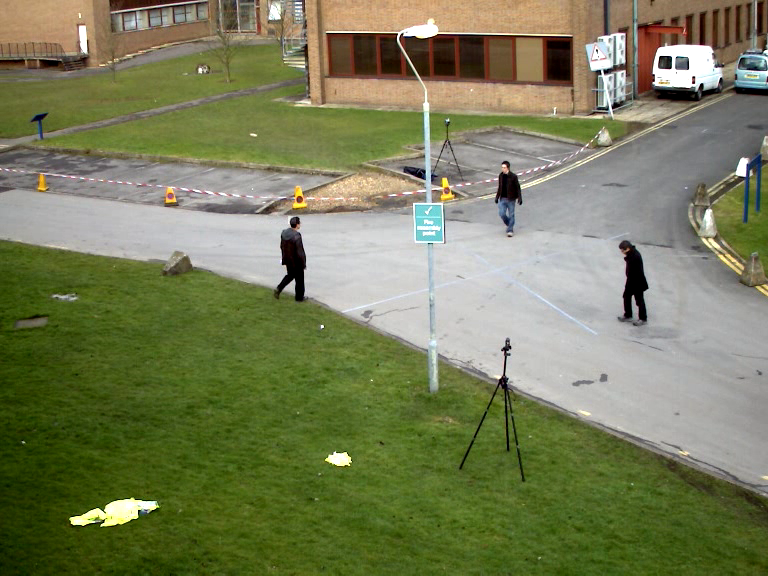

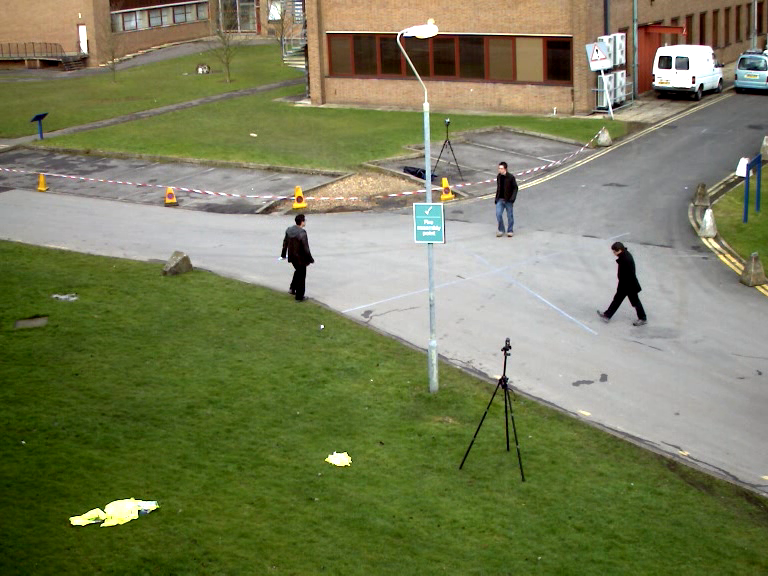

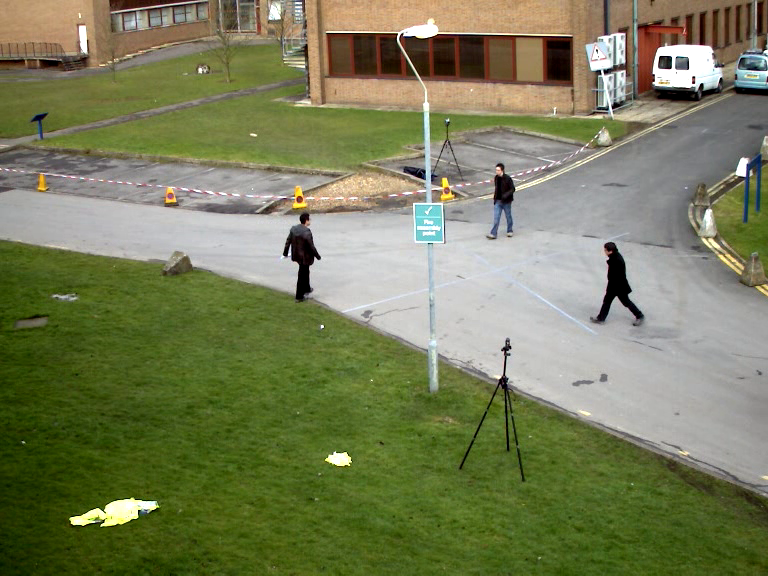

In [12]:
import numpy as np
import cv2 as cv2
from google.colab.patches import cv2_imshow
import sys

#pegar vídeo
cap = cv.VideoCapture('video.avi')

#mostrar os primeiros 5 frames
for i in range(6):
#se quiser mostrar todos os frames do vídeo, basta usar o loop comentado abaixo
#wile cap.isOpened():
  ret, frame = cap.read()  #exibir o vídeo

  #if frame is read correctly ret is True
  if not ret:
    print("Can't receive frame (stream end?). Exiting...")
    break
  cv2_imshow(frame)

cap.release() #liberar memória

**LEITURA DE IMAGENS A PARTIR DE UMA CÂMERA**

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      //pedir acesso à câmera
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


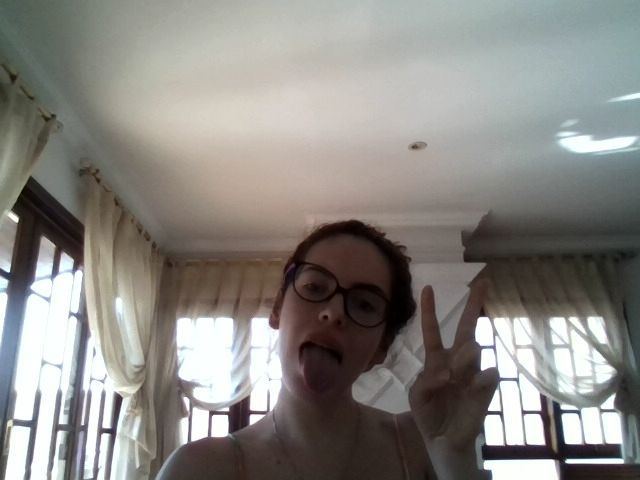

In [14]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

EXEMPLO: capturar X frames da câmera, converte-los para níveis de cinza e salvar em arquivos separados

<IPython.core.display.Javascript object>

Saved to eu#0.jpg


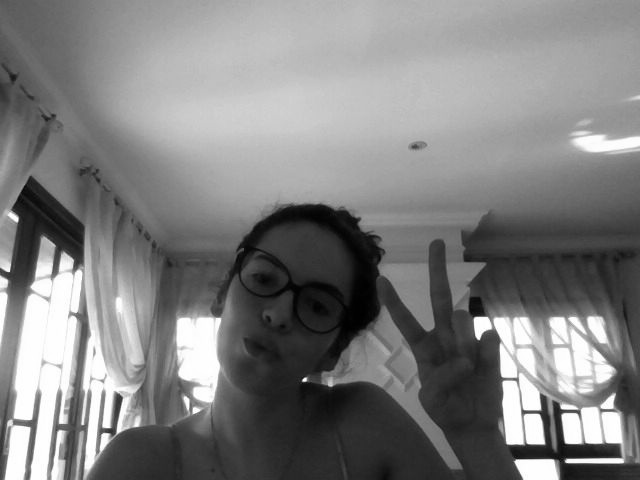

In [15]:
from IPython.display import Image
for i in range(1):
  try:
    #outra solução: filename = take_photo(filename='eu#'+str(i)+'.jpg')
    filename = take_photo(filename='eu#{}.jpg'.format(i))
    print('Saved to {}'.format(filename))
    img = cv.imread(filename)
    cv.imwrite(filename,cv.cvtColor(img,cv.COLOR_BGR2GRAY))
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

**PROPRIEDADES DE IMAGENS**

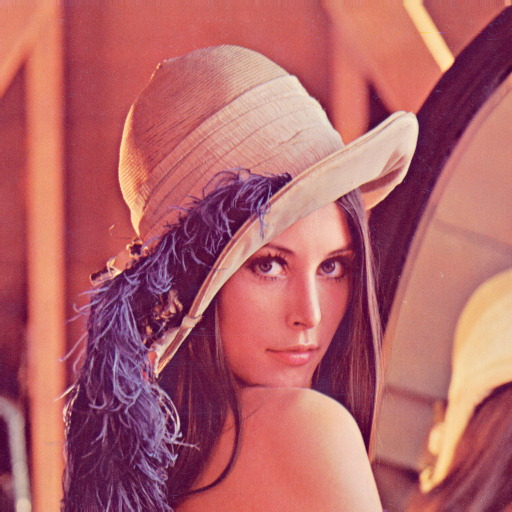

(512, 512, 3)
786432 pixels
uint8


In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)

#It returns a tuple of the number of rows, columns, and channels (if the image is color)
print( img.shape )

print(img.size,"pixels")  #número total de pixels

print(img.dtype)  #tipo de dado usado na representação de cor de cada pixel

**ACESSO AOS PIXELS DA IMAGEM**

Usamos uma linha e uma coluna (o canto superior esquerdo é a origem da imagem [0,0]). Se a imagem for colorida (3 canais), o resultado mostra o valor dos canais B, G e R.


In [18]:
#alterar valor de pixel -> indicar valor da coordenada (linha,coluna) e atribuir os valores dos canais 
img[100,100] = [255,255,255]
print( img[100,100] )

[255 255 255]


EXEMPLO: convertendo a imagem em níveis de cinza para imagem binária utilizando as operações de manipulação de pixel.

Se os canais não aparecem, supomos que temos apenas 1 canal de cor.

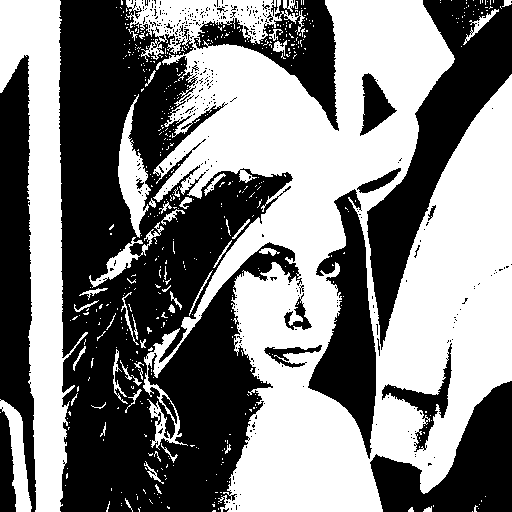

In [19]:
import numpy as np

lin,col = gray_img.shape
T = np.median(gray_img) #mediana

for l in range(lin):
  for c in range(col):
    if gray_img[l,c]<T:
      gray_img[l,c]=0
    else:
      gray_img[l,c]=255

cv2_imshow(gray_img)

**REGION OF INTEREST (ROI)**

Algumas vezes estamos interessados em trabalhar apensa com uma determinada região da imagem. Para definir uma ROI, definimos um slice na matriz que representa internamente a imagem.

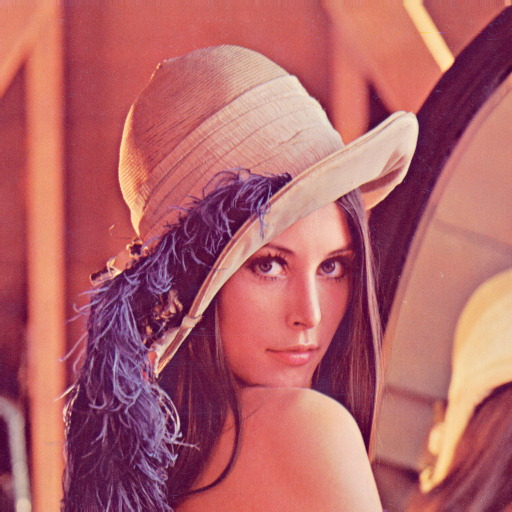

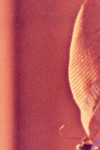

In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")

if img is None:
  sys.exit("Could not read the image.")

cv2_imshow(img)
roi = img[100:250,50:150]
cv2_imshow(roi)

EXEMPLO: definir uma ROI qualquer e copiá-la para um outro lugar na imagem.

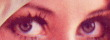

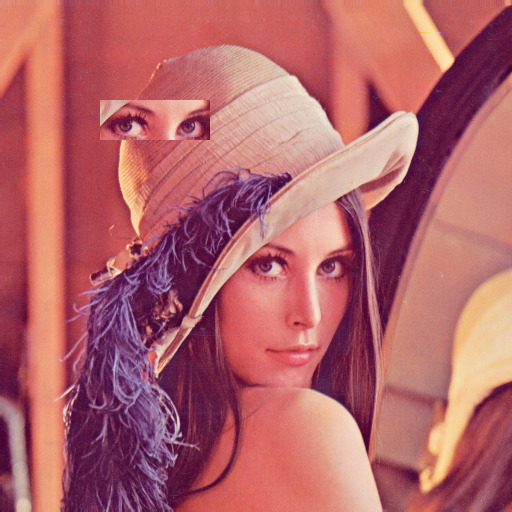

In [23]:
roi3 = img[240:280,240:350]
cv2_imshow(roi3)
img2 = img.copy()
img2[100:140,100:210] = roi3
cv2_imshow(img2)

**DECOMPOSIÇÃO E JUNÇÃO DE CANAIS DE COR**

A separação (split) e junção (merge) de canais é feita como abaixo.

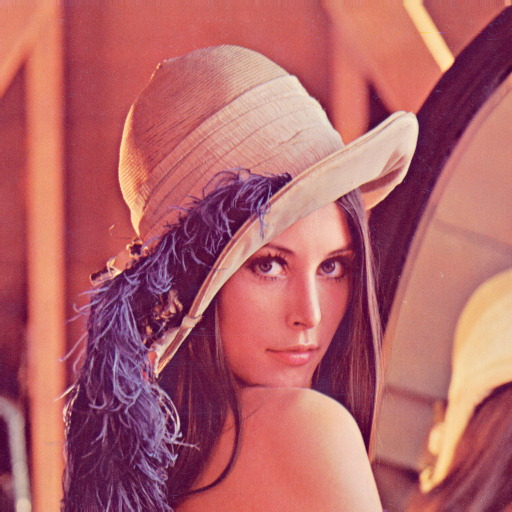

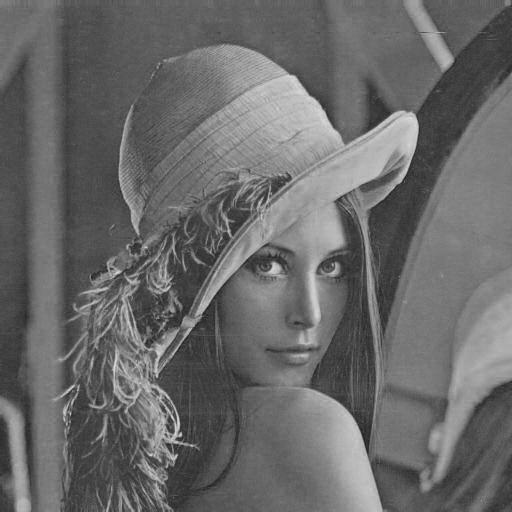

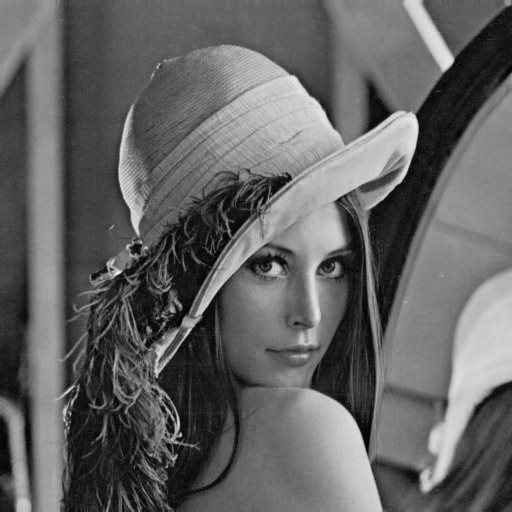

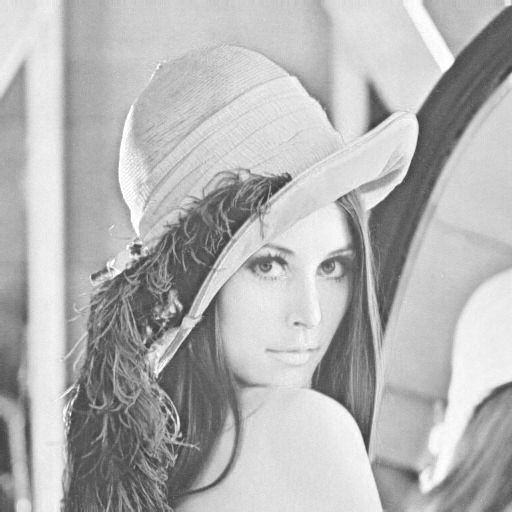

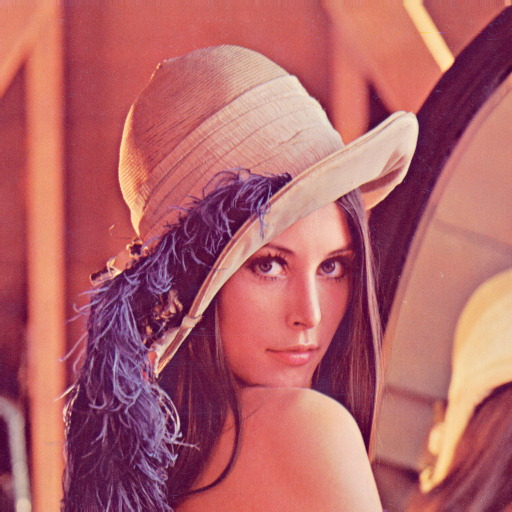

In [24]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys

img = cv.imread("lena.jpg")
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)

b,g,r = cv.split(img)  #separação em bgr
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

img = cv.merge((b,g,r))  #junção

cv2_imshow(img)

EXEMPLO: pegar uma imagem em níveis de cinza e colorizá-la artificialmente, gerando uma imagem com 3 canais de cor (B,G,R).